EDA project:

Section 1: Dataset Loading & Initial Overview
Section 2: Data Cleaning
Section 3: Data Transformation
Section 4: Exploratory Data Analysis
Section 5: Visualization & Insights
Section 6: Summary

 Dataset Loading

In [115]:
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns

In [116]:
# To load the dataset
df = pd.read_csv('top50.csv',encoding='latin-1')

Dataset Structure

In [117]:
df.shape

(50, 14)

This shows that there are 50 rows and 14 columns.
Each row represents one unique song, and the columns represent its metadata, audio characteristics, and popularity metrics.

In [118]:
# To view first 5 row
df.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


Track.Name – The title of the song.

Artist.Name – The performer or band who recorded the song.

Genre – The musical style or category of the track (e.g., canadian pop, dance pop, reggaeton flow).

Beats.Per.Minute – The tempo of the track, measured in BPM (beats per minute). Higher BPM usually means a faster-paced song.

Energy – A numerical measure (0–100) of the track’s intensity and activity. Higher values indicate more energetic, loud, and fast songs.

Danceability – A score (0–100) describing how suitable the track is for dancing. Higher values suggest a strong beat and rhythmic stability.

Loudness..dB.. – The overall loudness of a track in decibels (dB). Negative values are typical in audio engineering.

Liveness – Indicates the likelihood of the track being performed live. Higher values suggest more audience sounds or live performance elements.

Valence. – A measure (0–100) of musical positiveness. Higher scores correspond to happier, more cheerful-sounding tracks.

Length. – Track duration in seconds.

Acousticness.. – A score (0–100) estimating the likelihood of a track being acoustic.

Speechiness. – A measure (0–100) of spoken words in a track. Higher values indicate more speech-like content.

Popularity – A Spotify metric (0–100) showing how popular the track is at the time of data collection, based on streams and recency.

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        50 non-null     int64 
 1   Track.Name        50 non-null     object
 2   Artist.Name       50 non-null     object
 3   Genre             50 non-null     object
 4   Beats.Per.Minute  50 non-null     int64 
 5   Energy            50 non-null     int64 
 6   Danceability      50 non-null     int64 
 7   Loudness..dB..    50 non-null     int64 
 8   Liveness          50 non-null     int64 
 9   Valence.          50 non-null     int64 
 10  Length.           50 non-null     int64 
 11  Acousticness..    50 non-null     int64 
 12  Speechiness.      50 non-null     int64 
 13  Popularity        50 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 5.6+ KB


50 rows, all non-null → no missing values to clean.

3 categorical columns → Track.Name, Artist.Name, Genre (dtype: object).

11 numerical columns → all int64, representing song metrics.



In [120]:
df.describe(include= "all")

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
count,50.00000,50,50,50,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
unique,NaN,50,38,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Señorita,Ed Sheeran,dance pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,4,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,25.50000,NaN,NaN,NaN,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,14.57738,NaN,NaN,NaN,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,1.00000,NaN,NaN,NaN,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,13.25000,NaN,NaN,NaN,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,25.50000,NaN,NaN,NaN,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,37.75000,NaN,NaN,NaN,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000


The descriptive statistics give us a detailed snapshot of both numerical and categorical columns. Here’s what we can learn from the table:

Categorical Columns
Track.Name – All 50 songs are unique (unique = 50), which means there are no duplicates in track names.

Artist.Name – We have 38 unique artists, meaning some artists appear multiple times. For example, Ed Sheeran appears 4 times, making him the most frequent artist in this dataset.

Genre – There are 21 distinct genres, with dance pop being the most common, appearing 8 times. This shows a strong representation of upbeat, mainstream genres.

Numerical Columns
Beats.Per.Minute – Tempo values range from 85 BPM (slower songs) to 174 BPM (faster tracks). The average tempo is around 120 BPM, which is a typical upbeat pace for pop music.

Energy – Values range between 32 (calmer, softer songs) and 85 (very energetic). The average energy score is around 64, meaning most songs are moderately upbeat.

Danceability – Scores range from 29 (less danceable tracks) to 86 (highly danceable). The mean is 71, showing this dataset leans towards dance-friendly songs.

Loudness..dB.. – Between -11 dB and -3 dB. Louder songs are closer to -3 dB, quieter ones around -11 dB.

Liveness – Varies from 5 (studio-produced tracks) to 26 (likely live performances). Average ~15, suggesting most songs are studio recordings with minimal live elements.

Valence. – From 10 (sad, somber) to 95 (happy, cheerful), with a mean of 55, meaning the dataset contains both emotionally bright and dark tracks.

Length. – Tracks are between 115 seconds (approx 2 minutes) and 310 seconds (approx5 minutes). The average is approx201 seconds (approx3 min 21 sec), fitting typical pop song lengths.

Acousticness.. – Ranges from 1 (fully electronic) to 70 (highly acoustic), with an average of 22 — this suggests a majority of tracks are more electronic than acoustic.

Speechiness. – Scores range from 3 (minimal spoken words) to 40 (rap-like or spoken tracks).

Popularity – High overall, between 70 and 95, with an average of 87.5. This confirms our dataset focuses on popular, well-streamed tracks.



In [121]:
    #We have 38 unique artists performing 50 unique songs, so some artists appear more than once.

   # The most frequent artist (Ed Sheeran for example) has 4 songs here, showing some artists dominate the playlist.

   # Danceability averages around 71 on a 0-100 scale, meaning the dataset favors songs that are generally dance-friendly.

    # Most songs (75%) have danceability below roughly 80, so the playlist has a good mix but mostly upbeat, rhythmic tracks.

Check for Missing Values

In [122]:
df.isnull().sum()


,0
Unnamed: 0,0
Track.Name,0
Artist.Name,0
Genre,0
Beats.Per.Minute,0
Energy,0
Danceability,0
Loudness..dB..,0
Liveness,0
Valence.,0


All columns have a value of 0, meaning there are no missing (null) values in any column of the dataset.

In [123]:
df.columns

Index(['Unnamed: 0', 'Track.Name', 'Artist.Name', 'Genre', 'Beats.Per.Minute',
       'Energy', 'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.',
       'Length.', 'Acousticness..', 'Speechiness.', 'Popularity'],
      dtype='object')

In [124]:
df.tail(2)

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
48,49,Call You Mine,The Chainsmokers,edm,104,70,59,-6,41,50,218,23,3,88
49,50,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,95,79,75,-6,7,61,206,21,12,82


In [125]:
df[['Danceability','Artist.Name']].sample(2)

,Danceability,Artist.Name
45,66,Marshmello
15,70,Chris Brown


In [126]:
# checking unique value in Artist.Name column
df['Artist.Name'].unique()

array(['Shawn Mendes', 'Anuel AA', 'Ariana Grande', 'Ed Sheeran',
       'Post Malone', 'Lil Tecca', 'Sam Smith', 'Lil Nas X',
       'Billie Eilish', 'Bad Bunny', 'DJ Snake', 'Lewis Capaldi', 'Sech',
       'Drake', 'Chris Brown', 'J Balvin', 'Y2K', 'Lizzo', 'MEDUZA',
       'Jhay Cortez', 'Lunay', 'Tones and I', 'Ali Gatie', 'Daddy Yankee',
       'The Chainsmokers', 'Maluma', 'Young Thug', 'Katy Perry',
       'Martin Garrix', 'Jonas Brothers', 'Lauv', 'Kygo', 'Taylor Swift',
       'Lady Gaga', 'Khalid', 'ROSALÍA', 'Marshmello', 'Nicky Jam'],
      dtype=object)

In [127]:
import numpy as np
df['Streams'] = [10000,20000,np.nan,1300000,np.nan]*10

what we did is we add new column so that we could perform operation for missing values

In [128]:
df.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity,Streams
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79,10000.0
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92,20000.0
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85,NaN
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86,1300000.0
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94,NaN


In [129]:
df['Streams'].head(50)

,Streams
0,10000.0
1,20000.0
2,NaN
3,1300000.0
4,NaN
5,10000.0
6,20000.0
7,NaN
8,1300000.0
9,NaN


In [130]:
df. isnull().sum()

,0
Unnamed: 0,0
Track.Name,0
Artist.Name,0
Genre,0
Beats.Per.Minute,0
Energy,0
Danceability,0
Loudness..dB..,0
Liveness,0
Valence.,0


The above data shows that we have 20 null value in streams column, but 0 in rest of the column.

  # Filling Missing data

In [131]:
 # fill missing popularity with median
df['Popularity'].fillna(df['Popularity'].median(), inplace=True)

/tmp/ipython-input-343819922.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Popularity'].fillna(df['Popularity'].median(), inplace=True)


In [132]:
df["Streams"].fillna(df['Streams'].median(), inplace = True)

/tmp/ipython-input-395086630.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Streams"].fillna(df['Streams'].median(), inplace = True)


In [133]:
df['Streams']

,Streams
0,10000.0
1,20000.0
2,20000.0
3,1300000.0
4,20000.0
5,10000.0
6,20000.0
7,20000.0
8,1300000.0
9,20000.0


In [134]:
df["Genre"]

,Genre
0,canadian pop
1,reggaeton flow
2,dance pop
3,pop
4,dfw rap
5,pop
6,trap music
7,pop
8,country rap
9,electropop


In [135]:
# Categorical Data
df['Genre']= df["Genre"]. replace("brostep", np.nan)

In [136]:
df["Genre"]

,Genre
0,canadian pop
1,reggaeton flow
2,dance pop
3,pop
4,dfw rap
5,pop
6,trap music
7,pop
8,country rap
9,electropop


In [137]:
missing_genre_rows = df[df['Genre'].isna()]

print(missing_genre_rows)

    Unnamed: 0       Track.Name Artist.Name Genre  Beats.Per.Minute  Energy  \
45          46  One Thing Right  Marshmello   NaN                88      62   
47          48          Happier  Marshmello   NaN               100      79   

    Danceability  Loudness..dB..  Liveness  Valence.  Length.  Acousticness..  \
45            66              -2        58        44      182               7   
47            69              -3        17        67      214              19   

    Speechiness.  Popularity  Streams  
45             5          88  10000.0  
47             5          88  20000.0  


In [138]:
df.isnull().sum()

,0
Unnamed: 0,0
Track.Name,0
Artist.Name,0
Genre,2
Beats.Per.Minute,0
Energy,0
Danceability,0
Loudness..dB..,0
Liveness,0
Valence.,0


In [139]:
df.dropna(subset = ["Genre"])

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity,Streams
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79,10000.0
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92,20000.0
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85,20000.0
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86,1300000.0
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94,20000.0
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84,10000.0
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92,20000.0
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90,20000.0
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87,1300000.0
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95,20000.0


Dropping Nan from genre column

In [140]:
df["Genre"]

,Genre
0,canadian pop
1,reggaeton flow
2,dance pop
3,pop
4,dfw rap
5,pop
6,trap music
7,pop
8,country rap
9,electropop


In [141]:
df['Energy']

,Energy
0,55
1,81
2,80
3,65
4,65
5,68
6,64
7,68
8,62
9,43


In [142]:
df

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity,Streams
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79,10000.0
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92,20000.0
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85,20000.0
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86,1300000.0
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94,20000.0
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84,10000.0
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92,20000.0
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90,20000.0
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87,1300000.0
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95,20000.0


In [143]:
df.nunique()

,0
Unnamed: 0,50
Track.Name,50
Artist.Name,38
Genre,20
Beats.Per.Minute,31
Energy,31
Danceability,29
Loudness..dB..,9
Liveness,22
Valence.,39


In [144]:
df.dtypes

,0
Unnamed: 0,int64
Track.Name,object
Artist.Name,object
Genre,object
Beats.Per.Minute,int64
Energy,int64
Danceability,int64
Loudness..dB..,int64
Liveness,int64
Valence.,int64


Outlier Detection and Treatment

In [145]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

energy = [
    55, 81, 80, 65, 65, 68, 64, 68, 62, 43, 62, 71, 41, 79, 50,45, 65, 48, 39, 62, 74, 59, 79, 78, 45, 82, 59, 46, 86, 79, 51, 32, 71, 59, 88, 72, 70, 82, 73, 56, 68, 68, 39, 40, 69,
    62, 75, 79, 70, 79
]


minimum, Q1, median, Q3, maximum = np.quantile(energy, [0, 0.25, 0.5, 0.75, 1])

print("Minimum:", minimum)
print("Q1:", Q1)
print("Median:", median)
print("Q3:", Q3)
print("Maximum:", maximum)

iqr = Q3 - Q1
print("IQR:", iqr)

lower_fence = Q1 - 1.5 * iqr
upper_fence = Q3 + 1.5 * iqr
print("Lower Fence:", lower_fence)
print("Upper Fence:", upper_fence)


outliers = []
for num in energy:
    if num < lower_fence or num > upper_fence:
        outliers.append(num)

print("Outliers:", outliers)


Minimum: 32.0
Q1: 55.25
Median: 66.5
Q3: 74.75
Maximum: 88.0
IQR: 19.5
Lower Fence: 26.0
Upper Fence: 104.0
Outliers: []


The middle 50% of energy values mostly lie between around 55 and 75.

There are no outliers in the data, meaning all energy values are within a normal range.

The boxplot visually confirms there are no extreme values that stand apart.

This means the energy values are consistent and reliable for further analysis without needing to remove or adjust any extreme cases.



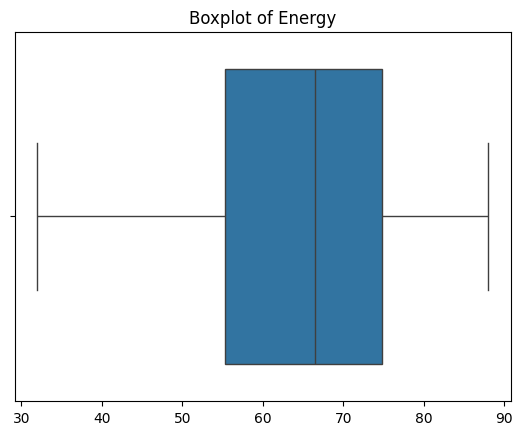

In [146]:
sns.boxplot(x=energy)
plt.title("Boxplot of Energy")
plt.show()

In [147]:
df_original = pd.read_csv("top50.csv", encoding='latin1')

Data Transformation:

In [148]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

what we did is
 we converted song names into many separate columns with 0 or 1.
 to change text data (song names) into numbers so the computer can understand and use them.

**Min-Max Scaling on Acousticness, Beats Per Minute, Danceability**

To rescaled these numeric features to values between 0 and 1.


**Label Encoding on Artist.Name**

To converT artist names into numeric codes for analysis.


**Created a New Feature: Beats.Per.Minute / Danceability Ratio**

Here we calculated ratio of beats per minute to danceability for each song.

Simply to gain insight by comparing two important music features directly.

In [149]:
ohe = OneHotEncoder()

In [150]:
ohe.fit_transform(df[['Track.Name']])
df['Track.Name']

,Track.Name
0,Señorita
1,China
2,boyfriend (with Social House)
3,Beautiful People (feat. Khalid)
4,Goodbyes (Feat. Young Thug)
5,I Don't Care (with Justin Bieber)
6,Ransom
7,How Do You Sleep?
8,Old Town Road - Remix
9,bad guy


In [151]:
ohe.fit_transform (df[['Track.Name']]). toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [152]:
encoded = ohe.fit_transform(df[['Track.Name']]).toarray()

In [153]:
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(['Track.Name']))

In [154]:
encoded_df

,Track.Name_0.958333333333333,Track.Name_7 rings,Track.Name_Antisocial (with Travis Scott),Track.Name_Beautiful People (feat. Khalid),Track.Name_Call You Mine,Track.Name_Callaita,Track.Name_China,Track.Name_Con Altura,Track.Name_Con Calma,Track.Name_Cross Me (feat. Chance the Rapper & PnB Rock),...,Track.Name_Takeaway,Track.Name_Talk,Track.Name_Te Robaré,Track.Name_The London (feat. J. Cole & Travis Scott),Track.Name_Truth Hurts,Track.Name_You Need To Calm Down,Track.Name_bad guy,Track.Name_bad guy (with Justin Bieber),Track.Name_boyfriend (with Social House),"Track.Name_fuck, i'm lonely (with Anne-Marie) - from 13 Reasons Why: Season 3"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [155]:

from sklearn. preprocessing import MinMaxScaler

In [156]:
min_max = MinMaxScaler()


In [157]:
df= pd.DataFrame(min_max.fit_transform (df[['Acousticness..', 'Beats.Per.Minute', 'Danceability']]),
                 columns = ['Acousticness..', 'Beats.Per.Minute	', 'Danceability' ])

In [158]:
df = pd.DataFrame(
    min_max.fit_transform(df[[ 'Beats.Per.Minute\t', 'Danceability']]),
    columns=[ 'Beats.Per.Minute\t', 'Danceability']
)


In [159]:
df.head()

,Beats.Per.Minute\t,Danceability
0,0.304762,0.770492
1,0.190476,0.819672
2,1.000000,0.180328
3,0.076190,0.573770
4,0.619048,0.475410


In [160]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Artist.Name_encoded"] = le.fit_transform(df_original["Artist.Name"])

In [161]:
df["Beats.Per.Minute\t_to_Dance_ratio"] = df["Beats.Per.Minute\t"] / df["Danceability"]
df

,Beats.Per.Minute\t,Danceability,Artist.Name_encoded,Beats.Per.Minute\t_to_Dance_ratio
0,0.304762,0.770492,32,0.395542
1,0.190476,0.819672,1,0.232381
2,1.000000,0.180328,2,5.545455
3,0.076190,0.573770,9,0.132789
4,0.619048,0.475410,28,1.302135
5,0.161905,0.836066,9,0.193651
6,0.904762,0.754098,20,1.199793
7,0.247619,0.311475,30,0.794987
8,0.485714,0.967213,19,0.502179
9,0.476190,0.672131,4,0.708479


# Exploratory Data Analysis (EDA)
 Descriptive Statistics:

In [162]:
df

,Beats.Per.Minute\t,Danceability,Artist.Name_encoded,Beats.Per.Minute\t_to_Dance_ratio
0,0.304762,0.770492,32,0.395542
1,0.190476,0.819672,1,0.232381
2,1.000000,0.180328,2,5.545455
3,0.076190,0.573770,9,0.132789
4,0.619048,0.475410,28,1.302135
5,0.161905,0.836066,9,0.193651
6,0.904762,0.754098,20,1.199793
7,0.247619,0.311475,30,0.794987
8,0.485714,0.967213,19,0.502179
9,0.476190,0.672131,4,0.708479


# Visualization:

# Danceability by Beats Per Minute
Shows how danceability scores are distributed for songs at different speeds (BPM).

Colors represent different BPM ranges.

Likely pattern: songs with mid-range BPMs appear most often in the high danceability range.

Helps identify which BPM ranges are best for making danceable tracks.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


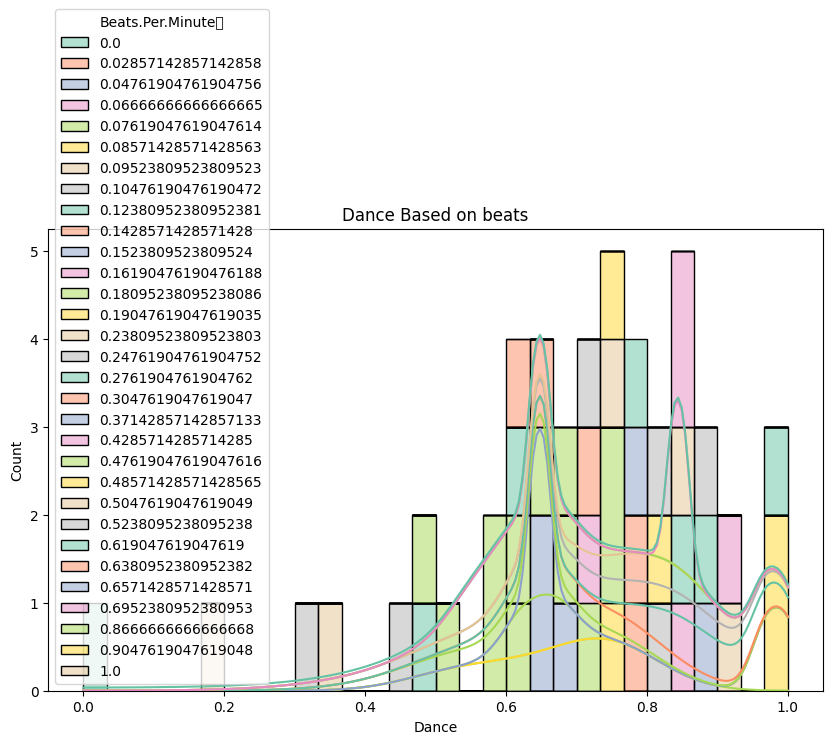

In [163]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='Danceability',hue='Beats.Per.Minute\t',bins=30,kde=True,multiple='stack',  palette='Set2')
plt.title('Dance Based on beats')
plt.xlabel('Dance')
plt.ylabel('Count')
plt.show()


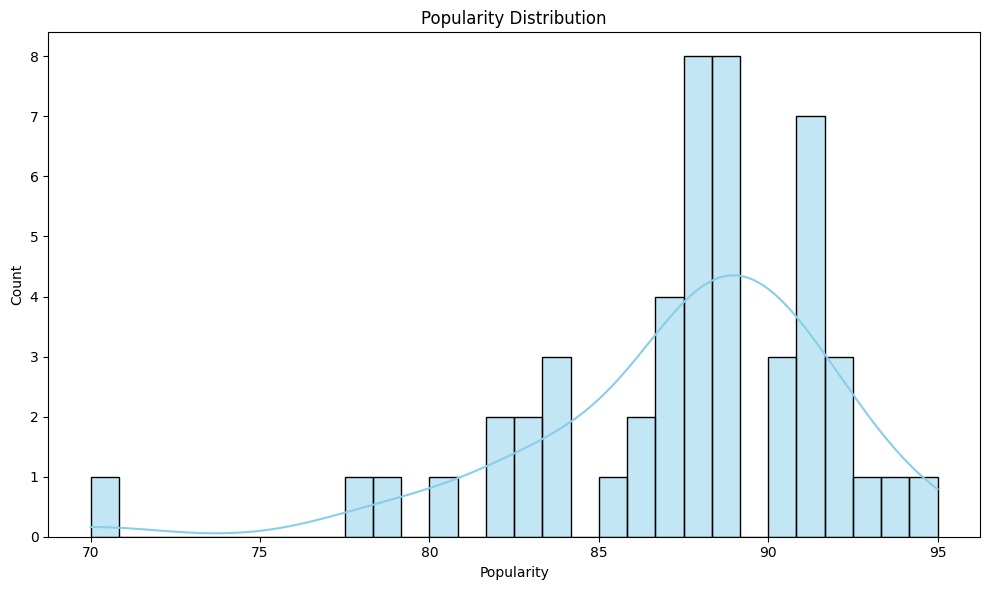

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(data=df_original, x='Popularity', bins=30, kde=True, color='skyblue')
plt.title('Popularity Distribution')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


Popularity Distribution
Shows how popular songs are overall.

Most songs fall in the medium-to-low popularity range.

Likely pattern: only a few songs reach the top popularity scores — “hits” are rare.

Helps spot where most songs sit in the popularity curve.


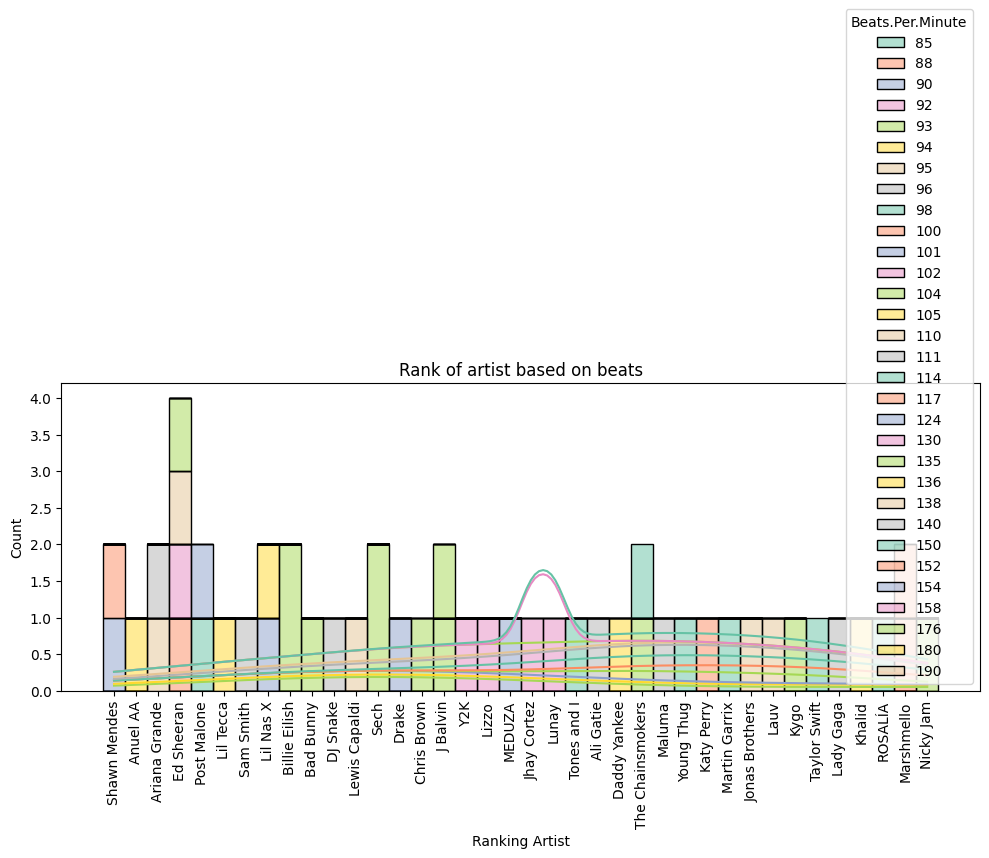

In [165]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_original, x='Artist.Name', hue='Beats.Per.Minute', bins=30, kde=True, multiple='stack', palette='Set2')
plt.title('Rank of artist based on beats')
plt.xlabel('Ranking Artist')
plt.ylabel('Count')
plt.tight_layout()
plt.xticks(rotation = 90)
plt.show()

# Artists by Beats Per Minute
Compares artists based on the BPM of their songs.

Colors represent different BPM ranges.

Likely pattern: some artists stick to a single BPM style, others mix fast and slow songs.

Helps identify artists who fit a specific tempo or mood.


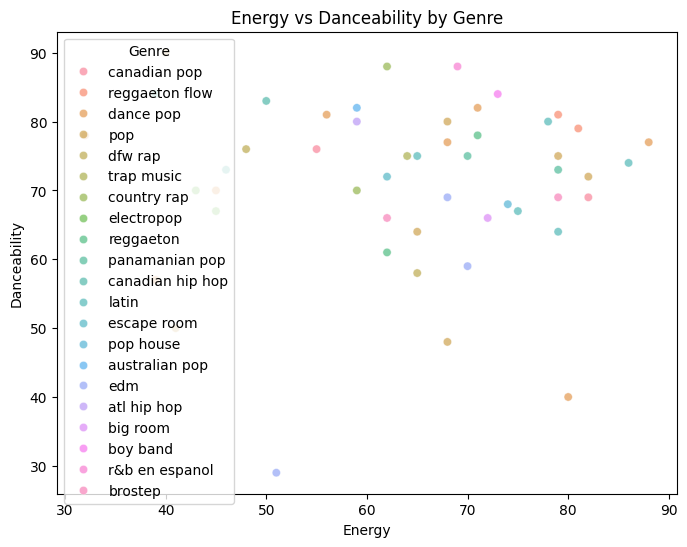

In [166]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_original, x='Energy', y='Danceability', hue='Genre', alpha=0.6)
plt.title('Energy vs Danceability by Genre')
plt.show()

# Energy vs Danceability by Genre
Compares songs’ energy and danceability across genres.

Colors show different music genres.

Likely pattern: genres like EDM or pop have high energy and danceability, while ballads or acoustic genres have lower energy.

Helps match genres to events (e.g., parties vs. relaxation).


# Distributions of Numeric Columns in Music Dataset

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


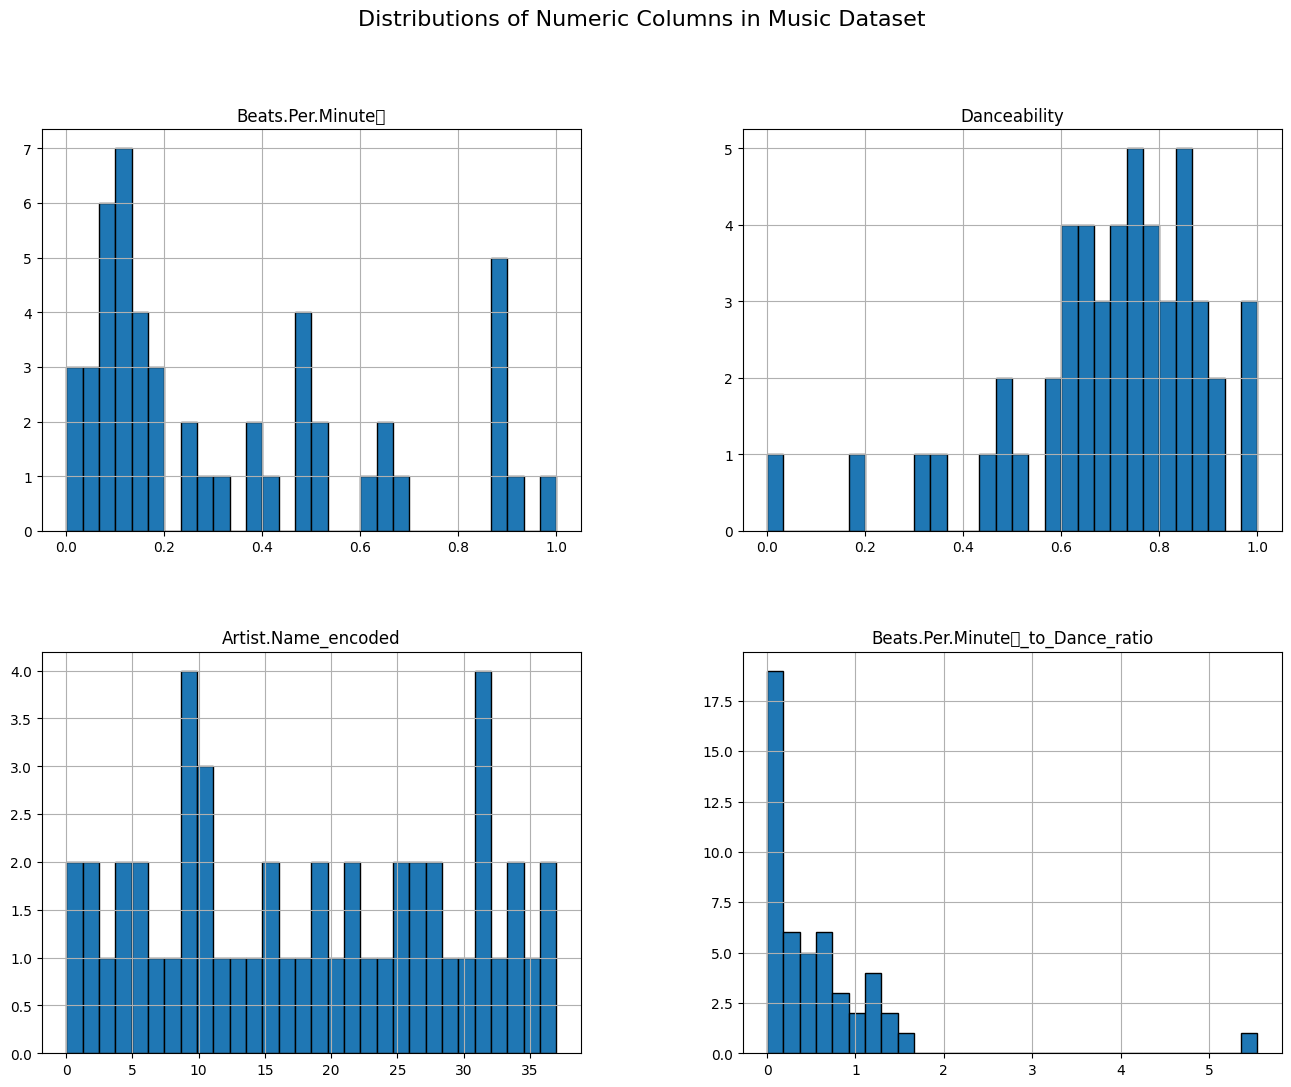

In [167]:
import matplotlib.pyplot as plt
import numpy as np

# We are selectING all numeric columns
num_cols = df.select_dtypes(include=np.number).columns

df[num_cols].hist(figsize=(16, 12), bins=30, edgecolor='black')
plt.suptitle("Distributions of Numeric Columns in Music Dataset", fontsize=16)
plt.tight_layout
plt.show()

**Histograms for All Numeric Columns**
Shows the spread of all numeric features (e.g., tempo, loudness, energy).

Helps spot patterns, skewed data, or unusual values in the dataset.

Likely pattern: some features like loudness may be tightly grouped, while tempo or energy could have wide variation.



/tmp/ipython-input-725492947.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_original, x='Genre', y='Energy', palette='Set3')


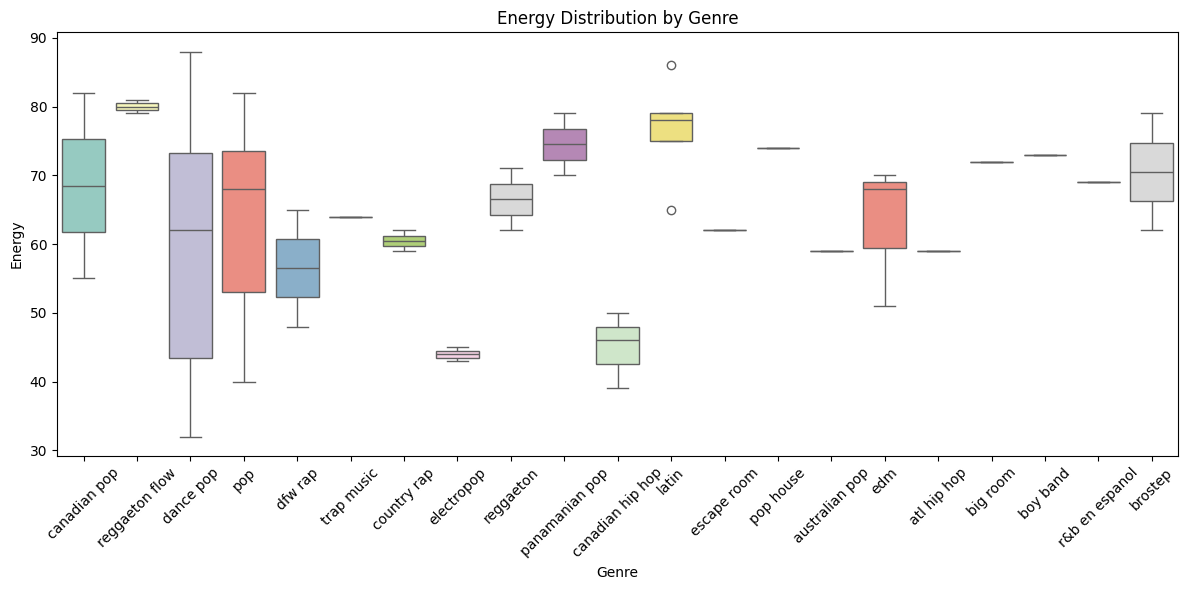

In [168]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_original, x='Genre', y='Energy', palette='Set3')
plt.title('Energy Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Energy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#  Energy Distribution by Genre
Each colored box represents the spread of Energy values for songs in a specific Genre.

The box shows the middle 50% of values (interquartile range), with the line inside showing the median energy for that genre.

The "whiskers" extend to the typical range of values.
while any dots beyond whiskers would be outliers (none are shown here).

Some genres, like dance pop and pop, have a wide energy range, meaning songs vary a lot in energy.

Other genres, like trap music and pop house, show very tight energy ranges that is songs are more similar in energy.

This helps identify genres where energy varies more, which could affect how we treat the data or model energy-related tasks.

/tmp/ipython-input-3897570357.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Beats.Per.Minute\t', y='Artist.Name_encoded', palette='Set3')


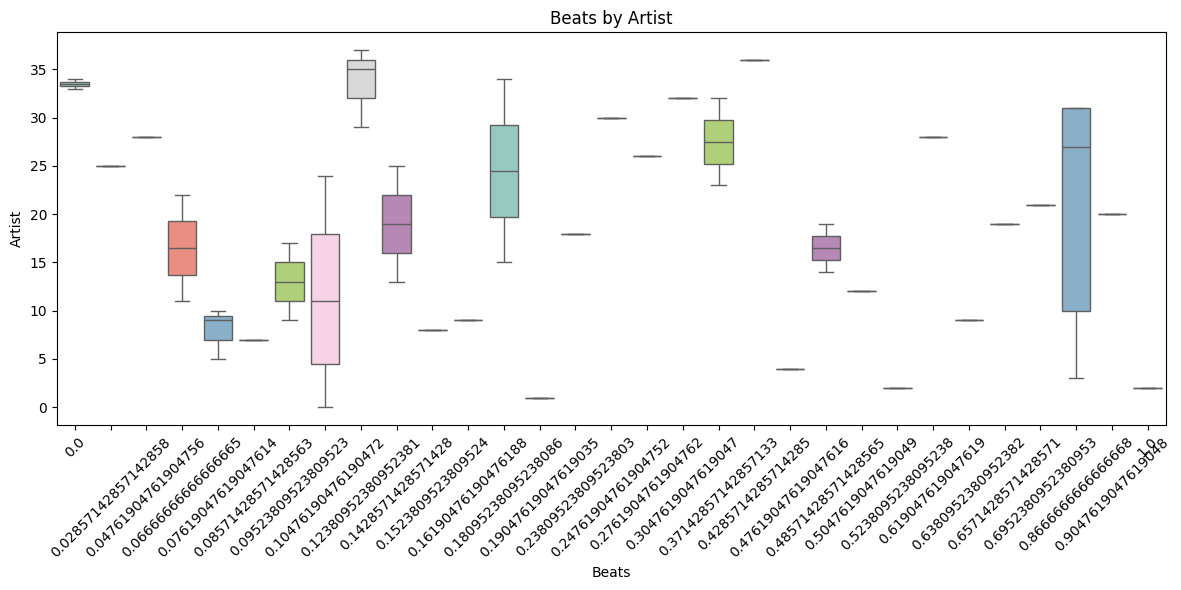

In [169]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Beats.Per.Minute\t', y='Artist.Name_encoded', palette='Set3')
plt.title('Beats by Artist')
plt.xlabel('Beats')
plt.ylabel('Artist')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Beats Per Minute (BPM) by Artist
Here, each box represents the distribution of Beats Per Minute (BPM) values for songs by a specific Artist

The boxplot shows how tempo varies across songs by the same artist.

Some artists have a wide spread in BPM, indicating they produce songs with a broad tempo range.

Others have narrow BPM ranges, meaning their songs tend to have similar tempo.

There are some potential outliers where BPM is unusually high or low for an artist.

This helps identify artists whose song tempos are highly variable and might require special handling in analysis or modeling.

**Correlation Heatmap**

Values near +1 mean strong positive correlation.

Values near -1 mean strong negative correlation.

Values near 0 mean no correlation.

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


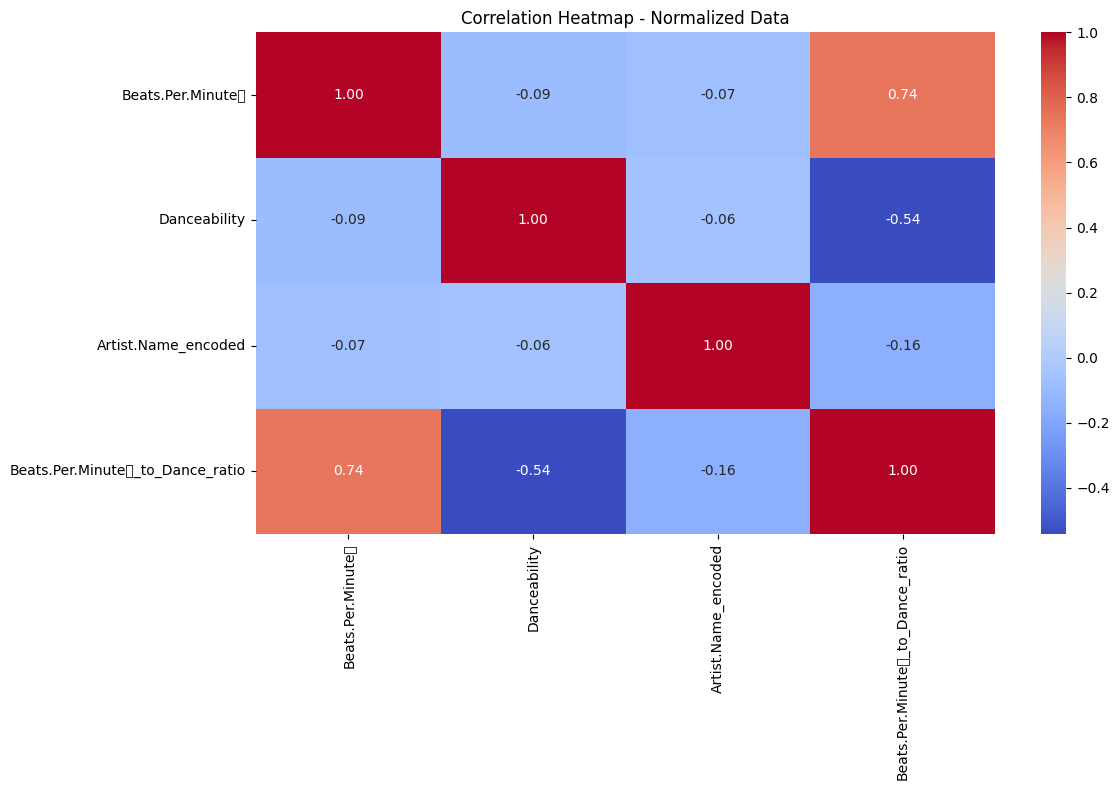

In [170]:
plt.figure(figsize=(12,8))
numeric_df = df.select_dtypes(include = ['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap - Normalized Data')
plt.tight_layout()
plt.show()

**Correlation Heatmap for Original Data**

This heatmap shows how numerical features in the original dataset relate to each other.

Values near +1 mean strong positive correlation.

Values near -1 mean strong negative correlation.

Values near 0 mean no correlation.
This helps identify relationships like whether higher Energy is related to higher Danceability or Loudness.

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


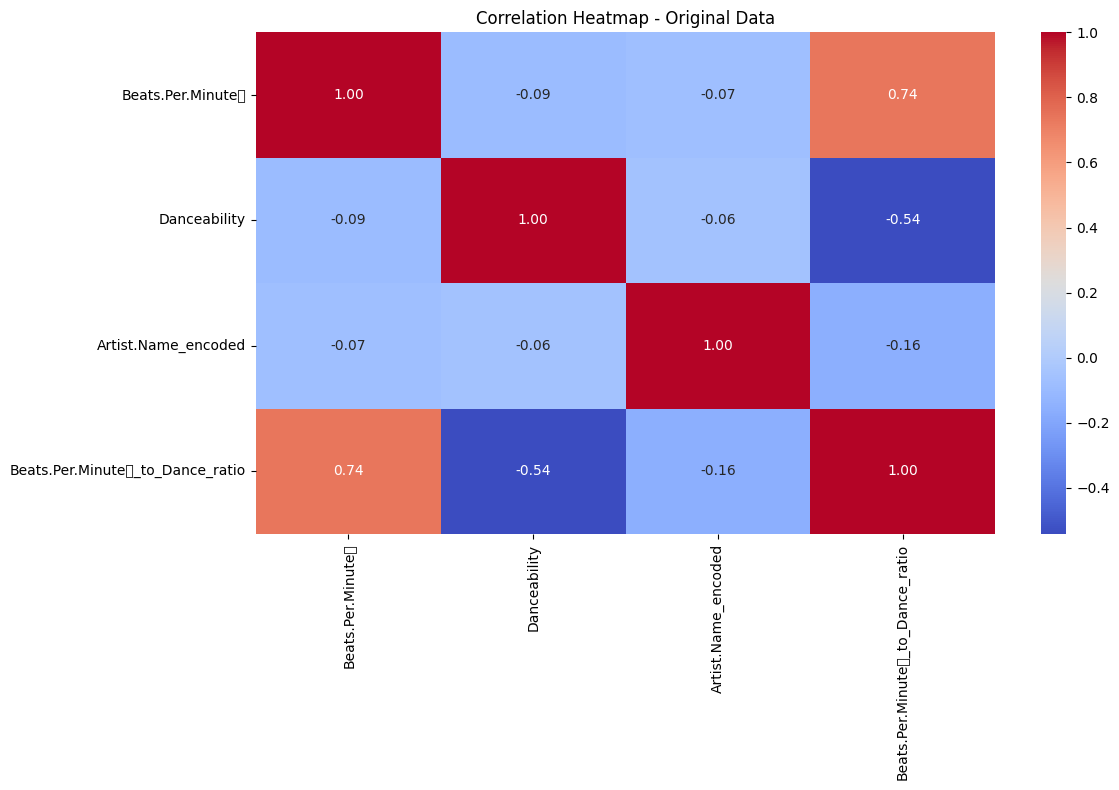

In [114]:
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap - Original Data')
plt.tight_layout()
plt.show()

Beats per Minute and beats per minute to dance ratio has the strongest relationship among the other category since it is closer to one whereas Danceability and Beat per minute to dance ratio has very strong relationship in terms of negative sign .  Also artist name and dance has weak relationship.

Thus:

**Strong positive correlation (~0.74) between Beats Per Minute and Beats Per Minute to Dance ratio: **
Both increase positively.


**Strong negative correlation (~ -0.54) between Danceability and Beats Per Minute to Dance ratio:**

As Danceability increases, the BPM-to-Dance ratio tends to decrease.

It suggests that songs which is easier to dance to might have different BPM characteristics.

**Weak correlations for Artist Name encoded variable:**

It indicates that there is no or very weak relationship among artist name and danceability.

In [171]:
df.corr(numeric_only = True)

,Beats.Per.Minute\t,Danceability,Artist.Name_encoded,Beats.Per.Minute\t_to_Dance_ratio
Beats.Per.Minute\t,1.000000,-0.094183,-0.073194,0.737724
Danceability,-0.094183,1.000000,-0.058348,-0.541977
Artist.Name_encoded,-0.073194,-0.058348,1.000000,-0.157136
Beats.Per.Minute\t_to_Dance_ratio,0.737724,-0.541977,-0.157136,1.000000


In [172]:
numeric_df = df.select_dtypes(include = ['number'])
numeric_df.head()

,Beats.Per.Minute\t,Danceability,Artist.Name_encoded,Beats.Per.Minute\t_to_Dance_ratio
0,0.304762,0.770492,32,0.395542
1,0.190476,0.819672,1,0.232381
2,1.000000,0.180328,2,5.545455
3,0.076190,0.573770,9,0.132789
4,0.619048,0.475410,28,1.302135


In [173]:
numeric_df.corr(method= "pearson")

,Beats.Per.Minute\t,Danceability,Artist.Name_encoded,Beats.Per.Minute\t_to_Dance_ratio
Beats.Per.Minute\t,1.000000,-0.094183,-0.073194,0.737724
Danceability,-0.094183,1.000000,-0.058348,-0.541977
Artist.Name_encoded,-0.073194,-0.058348,1.000000,-0.157136
Beats.Per.Minute\t_to_Dance_ratio,0.737724,-0.541977,-0.157136,1.000000


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()


<Axes: >

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


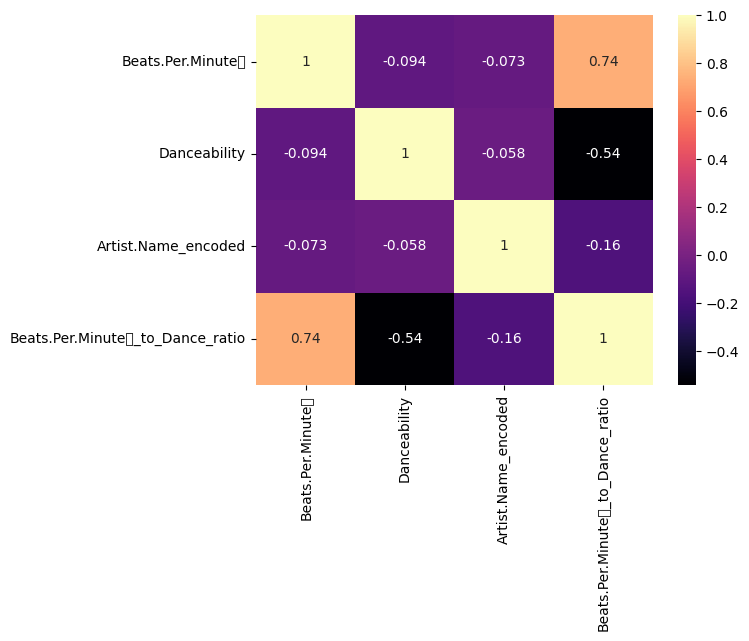

In [174]:
sns.heatmap(numeric_df.corr(method='pearson'),annot = True, cmap = "magma")

In [175]:
import plotly.express as px
numeric_df = df.select_dtypes(include='number')

fig=px.imshow (numeric_df.corr(),text_auto=True,height=800,width=800,color_continuous_scale=px.colors.sequential.Greens,aspect='auto',title='paiwise correlation of columns')
fig.update_layout(title_x=0.5)
fig.show()

**Dataset Overview**
The dataset consists of various audio features of songs, such as tempo (Beats Per Minute), energy, danceability, loudness, along with categorical data
including track names, artist names, and genres. The main goal was to analyze these features to understand patterns, relationships, and differences among genres and artists, which can be useful for music analysis or predictive modeling.


**Data Cleaning and Transformation:**
To prepare the data for analysis, we changed some text information (like artist names) into numbers because computers work better with numbers. We also scaled the data so that all features could be compared fairly, making sure no one feature with a big range dominates the analysis.

**Exploratory Data Analysis (EDA) and Key Findings:**

We used visual tools like histograms and boxplots to see how features like energy and tempo spread across different genres and artists.

We discovered that some genres, like dance pop, have a wide range of energy levels, while others, like trap music, are more consistent.

Artists also differ in tempo variety; some produce songs with very different speeds, while others stay consistent.

Looking at relationships between features, we found a strong positive connection between beats per minute and the beats-to-dance ratio. This means as tempo increases, the ratio also increases.

Danceability tends to have a negative relationship with the beats-to-dance ratio, showing that songs easier to dance to usually have a lower ratio.

Artist names showed little to no connection with danceability, meaning the artist doesn't strongly affect how danceable a song is.

In these findings help us understand how different musical features interact
and vary by genre and artist, which can be useful for music recommendation or categorization.